In [4]:
import os
import pywt
import torch
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def set_seed(seed: int = 42):
    random.seed(seed)                          # Python built-in random
    np.random.seed(seed)                       # NumPy random
    torch.manual_seed(seed)                    # CPU random seed
    torch.cuda.manual_seed(seed)               # GPU random seed (if used)
    torch.cuda.manual_seed_all(seed)           # All GPUs (if multiple GPUs)

    # Ensure deterministic behavior
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # Optional: for hash-based operations
    os.environ['PYTHONHASHSEED'] = str(seed)

In [6]:
# read data
folder = 'public/simple/'
path = f'{folder}_wavelets_cpu_expanded.pkl'

with open(path, 'rb') as f:
    attributions = pickle.load(f)
print(f"Attributions loaded from {path}")

Attributions loaded from public/simple/_wavelets_cpu_expanded.pkl


In [7]:
# print the type of attributions[key_]
print(attributions.keys())

dict_keys(['deletion', 'insertion', 'predictions', 'labels', 'wavelet_db1_6_128', 'filtermasks_wavelet_db1_6_128', 'wavelet_db2_5_128', 'filtermasks_wavelet_db2_5_128', 'wavelet_db3_4_128', 'filtermasks_wavelet_db3_4_128', 'wavelet_db4_3_128', 'filtermasks_wavelet_db4_3_128', 'wavelet_db5_3_128', 'filtermasks_wavelet_db5_3_128', 'wavelet_db6_3_128', 'filtermasks_wavelet_db6_3_128', 'wavelet_db7_2_128', 'filtermasks_wavelet_db7_2_128', 'wavelet_db8_2_128', 'filtermasks_wavelet_db8_2_128', 'wavelet_db9_2_128', 'filtermasks_wavelet_db9_2_128', 'wavelet_db10_2_128', 'filtermasks_wavelet_db10_2_128', 'wavelet_sym2_5_128', 'filtermasks_wavelet_sym2_5_128', 'wavelet_sym3_4_128', 'filtermasks_wavelet_sym3_4_128', 'wavelet_sym4_3_128', 'filtermasks_wavelet_sym4_3_128', 'wavelet_sym5_3_128', 'filtermasks_wavelet_sym5_3_128', 'wavelet_sym6_3_128', 'filtermasks_wavelet_sym6_3_128', 'wavelet_sym7_2_128', 'filtermasks_wavelet_sym7_2_128', 'wavelet_sym8_2_128', 'filtermasks_wavelet_sym8_2_128', 'wave

In [8]:
key_ = 'wavelet_db1_6_128'
print(type(attributions[key_]))
print(len(attributions[key_]))
print(len(attributions[key_][0]))
print(len(attributions[key_][0][0]))
print(len(attributions[key_][0][0][0]))
print(len(attributions[key_][0][0][0][0]))

<class 'list'>
1
128
1
1000
10


In [9]:
key_2 = f'filtermasks_{key_}'
print(type(attributions[key_2]))
print(len(attributions[key_2]))
print(len(attributions[key_2][0]))
print(len(attributions[key_2][0][0]))
print(len(attributions[key_2][0][0][0]))

<class 'list'>
1
128
1000
10


In [10]:
set_seed(42)

# stores the accuracy, mean true class prob and cross-entropy loss throughout the quantiles
for k in attributions['insertion'].keys():
    print(k)
    for val in range(len(attributions['insertion'][k])):
        print(attributions['insertion'][k][val])

wavelet_db1_6_128
[0.5078125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.5072259902954102, 0.9893307089805603, 0.9928309321403503, 0.9928415417671204, 0.9928640723228455, 0.9928886294364929, 0.9929124712944031, 0.9929324984550476, 0.9929487705230713, 0.9929715394973755, 0.9930393695831299, 0.9932658076286316, 0.9938356280326843, 0.9949973225593567, 0.9965826272964478, 0.9983711838722229, 0.9997855424880981, 0.9999866485595703, 0.9999980330467224, 0.9999988675117493, 0.9999989867210388]
[0.8175216317176819, 0.005478500388562679, 0.0036573049146682024, 0.0036519381683319807, 0.003640473587438464, 0.0036279321648180485, 0.003615765366703272, 0.003605562960729003, 0.003597213886678219, 0.0035855602473020554, 0.003551146714016795, 0.0034358438570052385, 0.0031443405896425247, 0.0025480056647211313, 0.0017354254378005862, 0.0008226395584642887, 0.00010743332677520812, 6.701551683363505e-06, 9.87661451290478e-07, 5.834724561282201e-0

In [11]:
# from a log output the complexities are all results
# print("Complexities: {'wavelet_db1_6_128': [np.float64(3.1501425132531957)], 'wavelet_db2_5_128': [np.float64(2.7429121066628666)], 'wavelet_db3_4_128': [np.float64(2.8101461932472898)], 'wavelet_db4_3_128': [np.float64(2.5610993173601226)], 'wavelet_sym2_5_128': [np.float64(2.7429121066628666)], 'wavelet_sym3_4_128': [np.float64(2.8101461932472898)], 'wavelet_sym4_3_128': [np.float64(2.5750239188673842)], 'wavelet_coif1_4_128': [np.float64(2.8758760678155997)], 'wavelet_coif2_3_128': [np.float64(2.562376315226119)], 'wavelet_coif3_2_128': [np.float64(2.1871345450988877)]}")
# print("Grad complexities: {'wavelet_db1_6_128': [np.float32(0.5566059)], 'wavelet_db2_5_128': [np.float32(0.5100968)], 'wavelet_db3_4_128': [np.float32(0.5107855)], 'wavelet_db4_3_128': [np.float32(0.39473084)], 'wavelet_sym2_5_128': [np.float32(0.5100968)], 'wavelet_sym3_4_128': [np.float32(0.5107855)], 'wavelet_sym4_3_128': [np.float32(0.42864695)], 'wavelet_coif1_4_128': [np.float32(0.51240665)], 'wavelet_coif2_3_128': [np.float32(0.50978905)], 'wavelet_coif3_2_128': [np.float32(0.37444177)]}")

# New results
print("Complexities: {'wavelet_db1_6_128': [np.float64(5.846378777587138)], 'wavelet_db2_5_128': [np.float64(5.664324147572552)], 'wavelet_db3_4_128': [np.float64(5.576851963807462)], 'wavelet_db4_3_128': [np.float64(5.55360462990631)], 'wavelet_db5_3_128': [np.float64(5.486892833667796)], 'wavelet_db6_3_128': [np.float64(5.449483319042187)], 'wavelet_db7_2_128': [np.float64(5.463217309720921)], 'wavelet_db8_2_128': [np.float64(5.415143859328939)], 'wavelet_db9_2_128': [np.float64(5.372345443227365)], 'wavelet_db10_2_128': [np.float64(5.3527525524772575)], 'wavelet_sym2_5_128': [np.float64(5.664324147572552)], 'wavelet_sym3_4_128': [np.float64(5.576851963807462)], 'wavelet_sym4_3_128': [np.float64(5.5380863506463545)], 'wavelet_sym5_3_128': [np.float64(5.500634911728748)], 'wavelet_sym6_3_128': [np.float64(5.443149155144836)], 'wavelet_sym7_2_128': [np.float64(5.456371583987888)], 'wavelet_sym8_2_128': [np.float64(5.409550388669297)], 'wavelet_sym9_2_128': [np.float64(5.3457219130348115)], 'wavelet_sym10_2_128': [np.float64(5.3526673822119335)], 'wavelet_coif1_4_128': [np.float64(5.620139231715205)], 'wavelet_coif2_3_128': [np.float64(5.491081548550795)], 'wavelet_coif3_2_128': [np.float64(5.392834297824038)], 'wavelet_coif4_2_128': [np.float64(5.367209129285769)], 'wavelet_coif5_1_128': [np.float64(5.330380660025182)]}")


Complexities: {'wavelet_db1_6_128': [np.float64(5.846378777587138)], 'wavelet_db2_5_128': [np.float64(5.664324147572552)], 'wavelet_db3_4_128': [np.float64(5.576851963807462)], 'wavelet_db4_3_128': [np.float64(5.55360462990631)], 'wavelet_db5_3_128': [np.float64(5.486892833667796)], 'wavelet_db6_3_128': [np.float64(5.449483319042187)], 'wavelet_db7_2_128': [np.float64(5.463217309720921)], 'wavelet_db8_2_128': [np.float64(5.415143859328939)], 'wavelet_db9_2_128': [np.float64(5.372345443227365)], 'wavelet_db10_2_128': [np.float64(5.3527525524772575)], 'wavelet_sym2_5_128': [np.float64(5.664324147572552)], 'wavelet_sym3_4_128': [np.float64(5.576851963807462)], 'wavelet_sym4_3_128': [np.float64(5.5380863506463545)], 'wavelet_sym5_3_128': [np.float64(5.500634911728748)], 'wavelet_sym6_3_128': [np.float64(5.443149155144836)], 'wavelet_sym7_2_128': [np.float64(5.456371583987888)], 'wavelet_sym8_2_128': [np.float64(5.409550388669297)], 'wavelet_sym9_2_128': [np.float64(5.3457219130348115)], 'w

In [12]:
def plot_scaleogram_wav_heatmap(signal, attribution, label:int, fs=100, wavelet='db1'):
    # print(attribution.shape)

    # Compute frequency bands
    freq_bands = [fs /  (2 ** (j + 1)) for j in range(len(attribution[0]))]   # bands
    freq_bands.append(0)                                        # lowest frequency
    freq_bands = freq_bands[::-1]                               # reverse the order
    # print(freq_bands)

    time = np.linspace(0, signal / fs, signal)
    

    # normalize attribution scores to [0,1]
    attribution = np.abs(attribution)
    attr_norm = (attribution - attribution.min()) / (attribution.max() - attribution.min() + 1e-10)

    # Create a 2D grid for heatmap
    time_grid, freq_grid = np.meshgrid(time, freq_bands)
    # make attr x one dim smaller
    attr_norm = attr_norm[1:,:]

    # Plot the scaleogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(time_grid, freq_grid, attr_norm.T, shading='auto', cmap='Greens')
    plt.colorbar(label="Normalized Attribution Score")
    plt.title(f'Attributions of class {label} learned through wavelet {wavelet}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.show()

In [13]:
counts_0 = 0
counts_1 = 0

fs = 1000

print(len(attributions['labels']))

for i in range(len(attributions['labels'])):
    if attributions['labels'][i] == 0:
        counts_0 += 1
    else:
        counts_1 += 1

print(f"Counts of label 0: {counts_0}, label 1: {counts_1}")

10000
Counts of label 0: 5000, label 1: 5000


THE MAX NUMER OF LEVELS IN THE KEY NAME IS WRONG
wavelet_db1_6_128


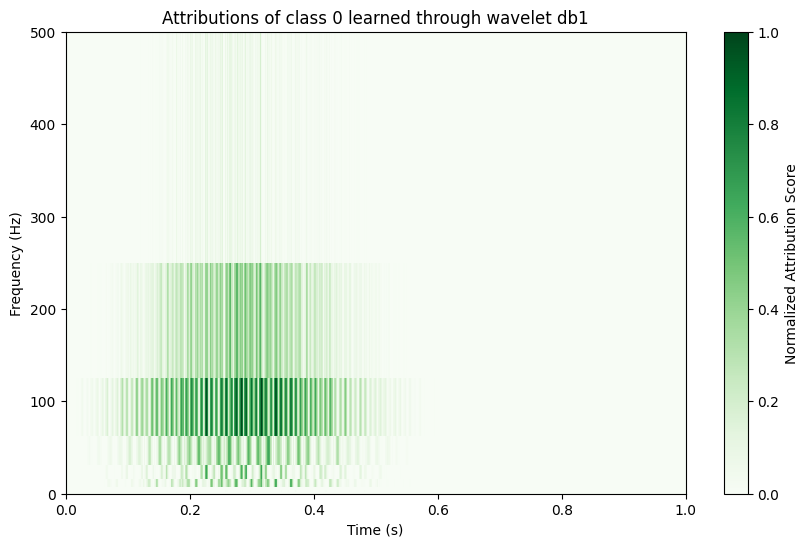

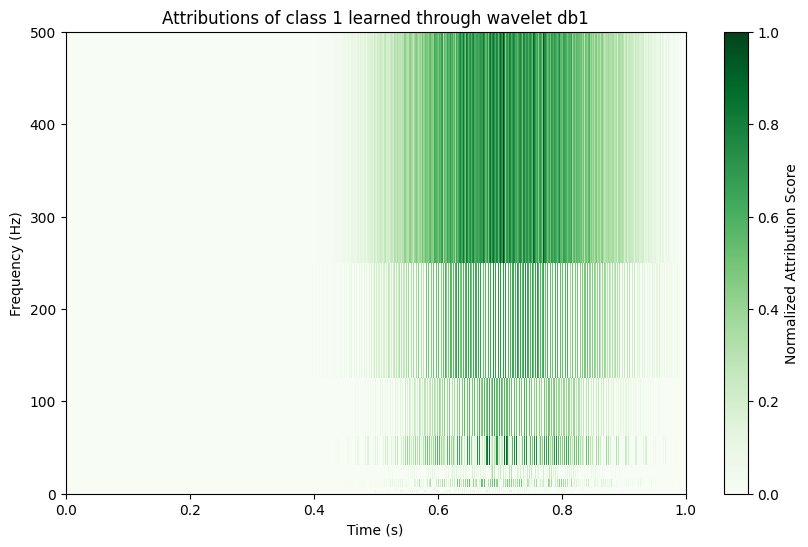

wavelet_db2_5_128


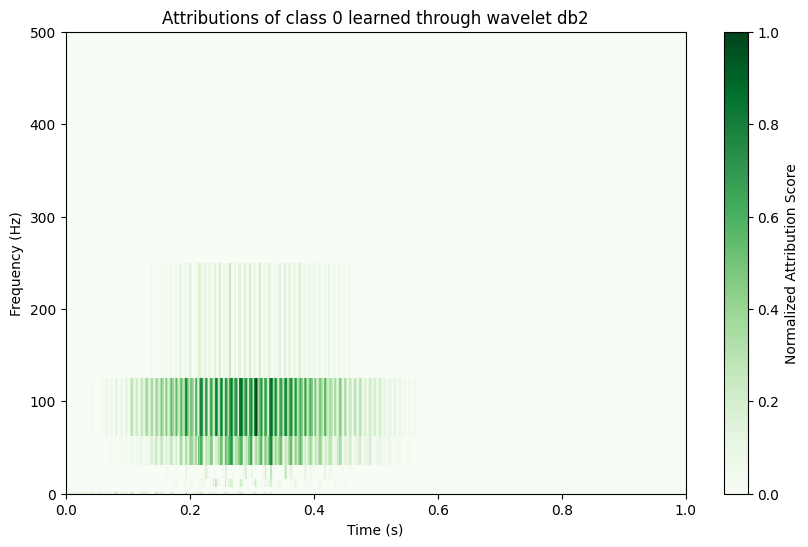

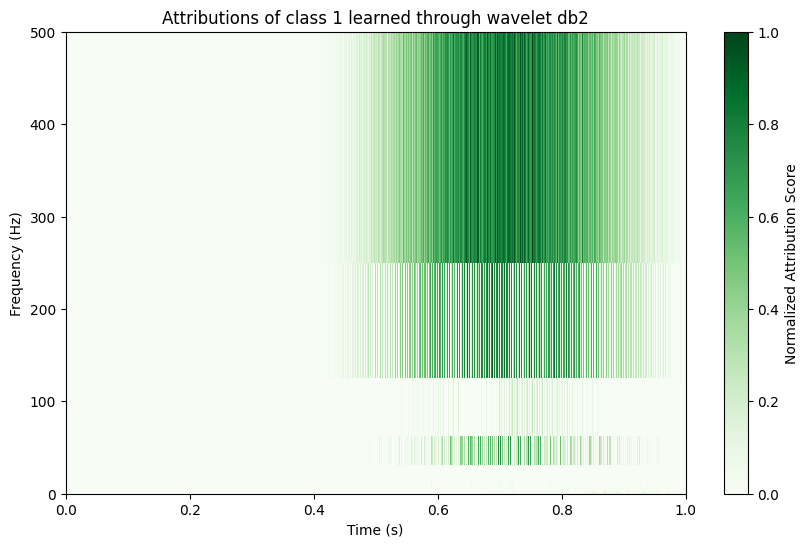

wavelet_db3_4_128


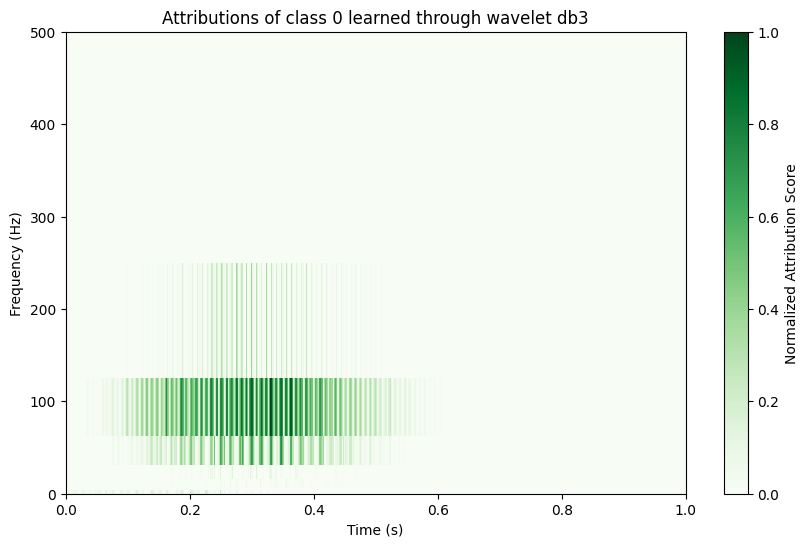

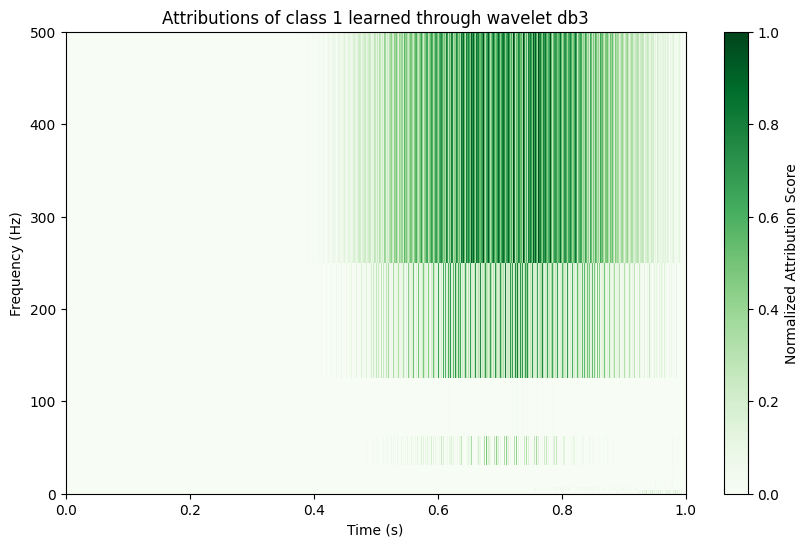

wavelet_db4_3_128


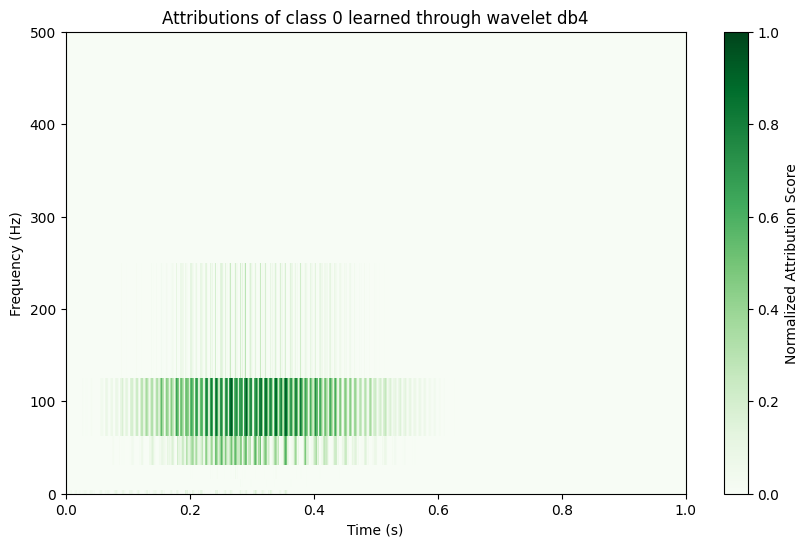

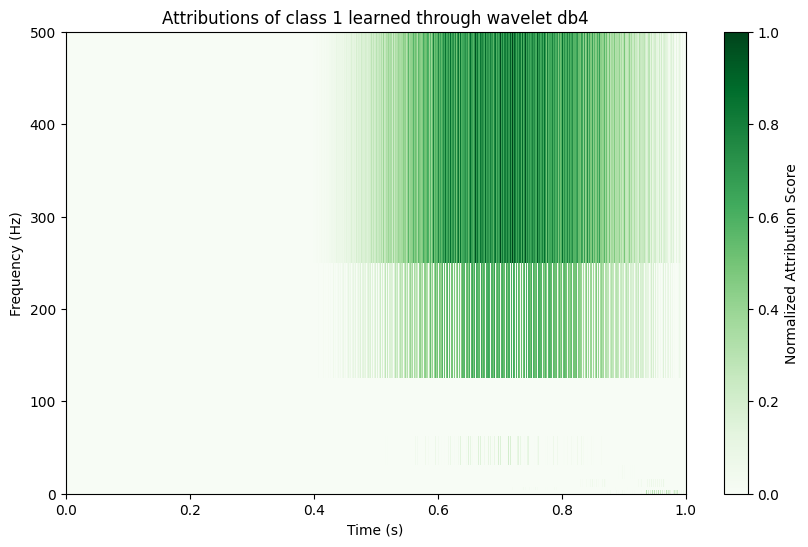

wavelet_db5_3_128


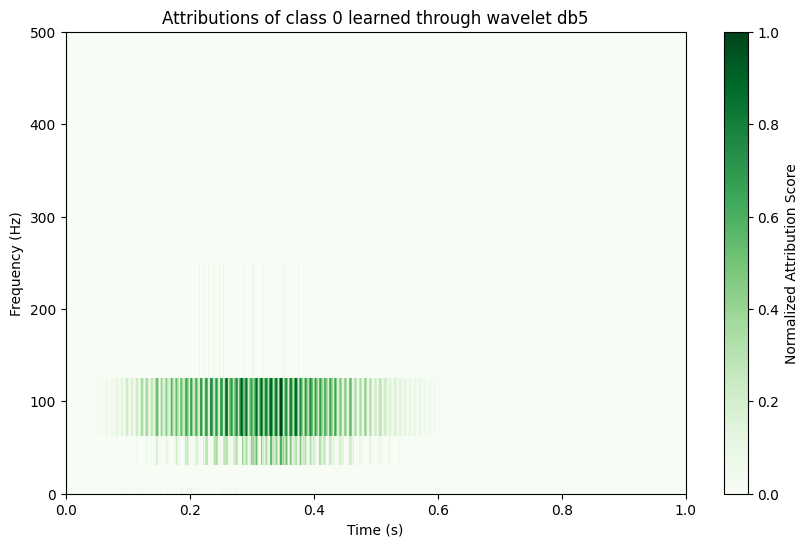

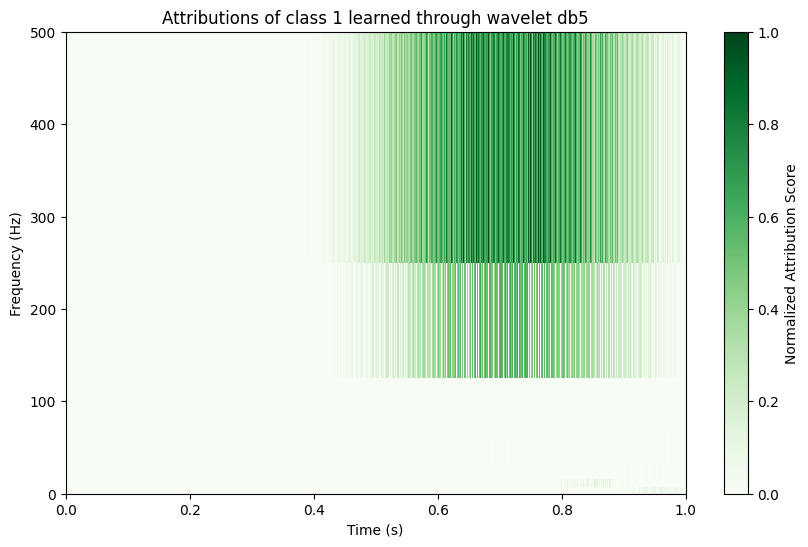

wavelet_db6_3_128


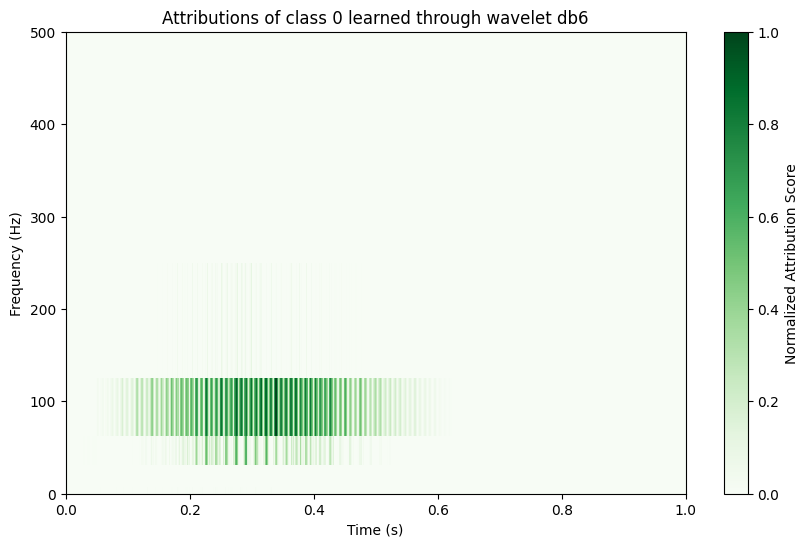

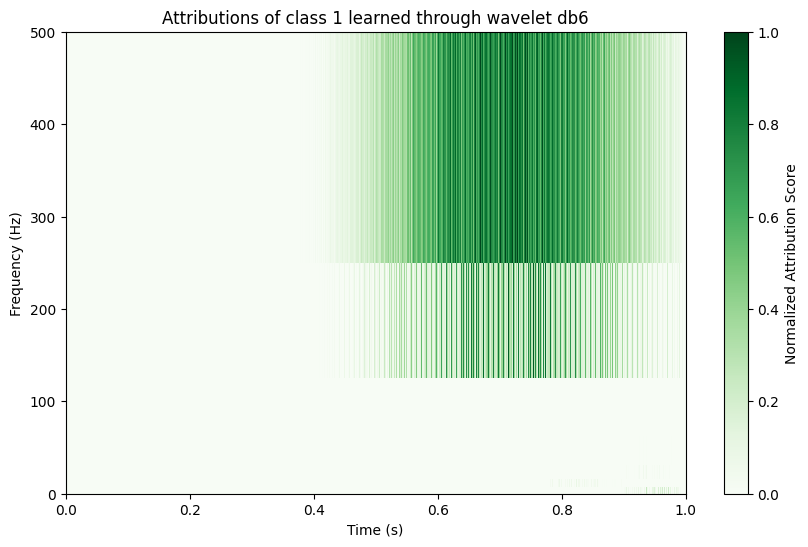

wavelet_db7_2_128


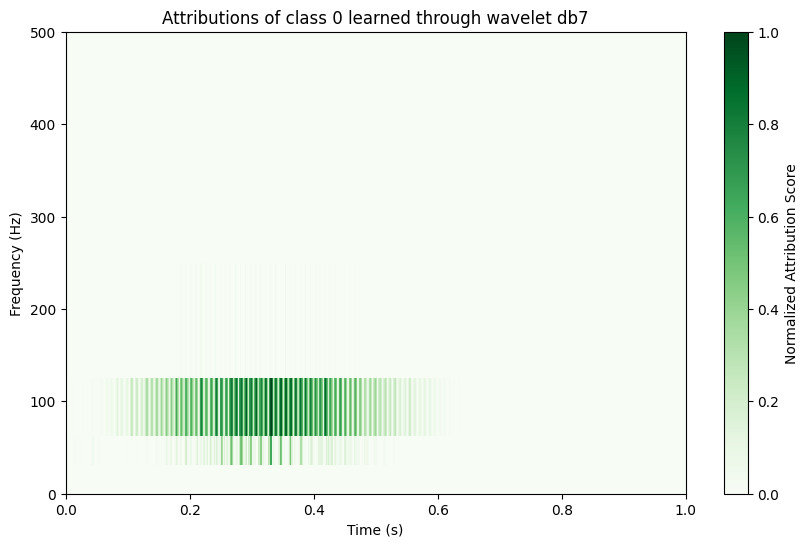

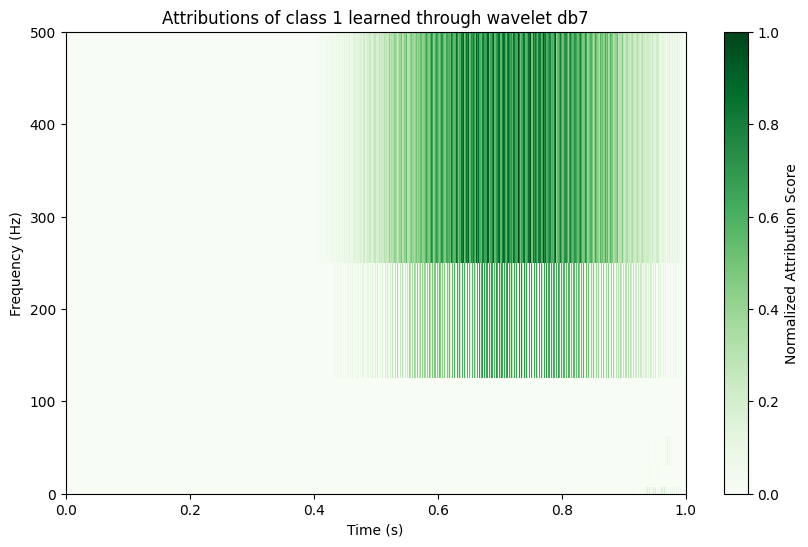

wavelet_db8_2_128


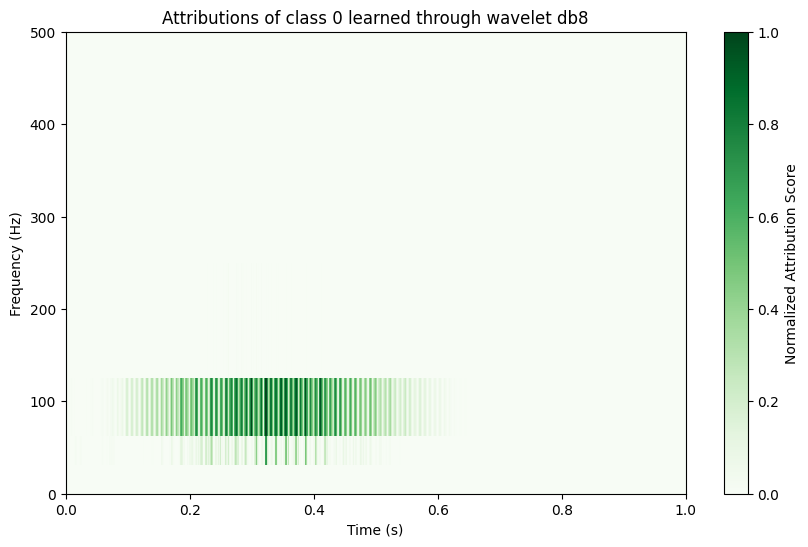

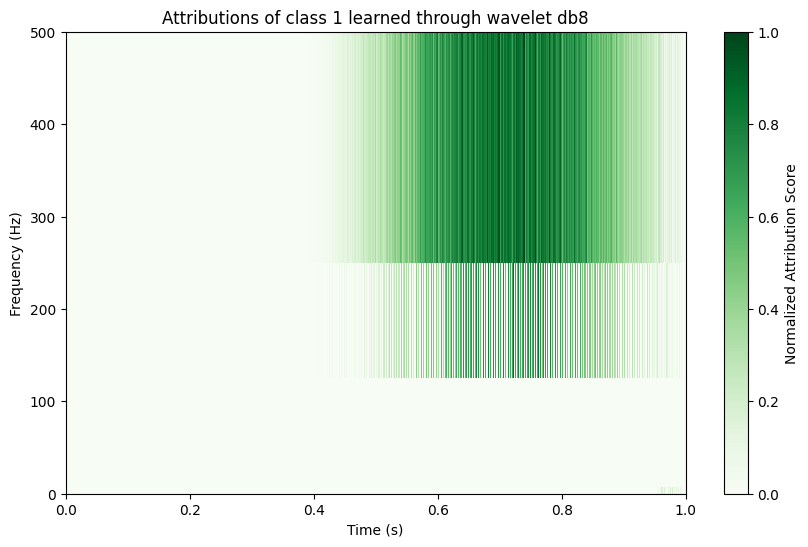

wavelet_db9_2_128


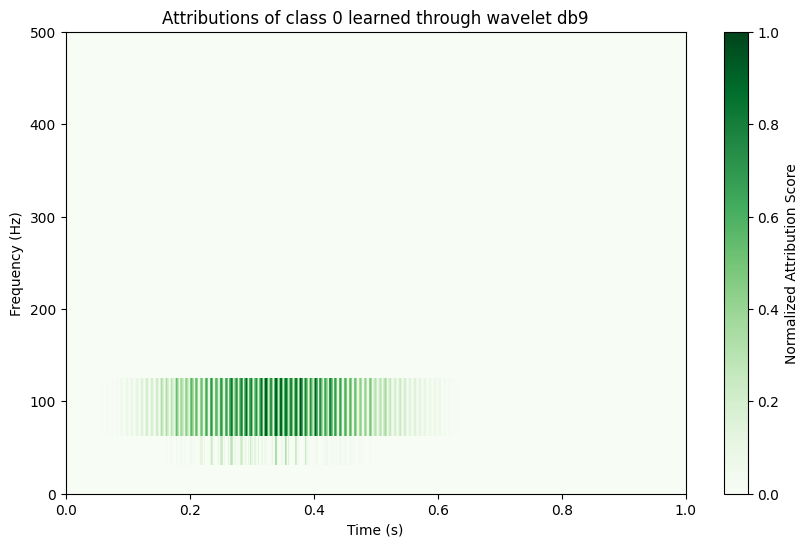

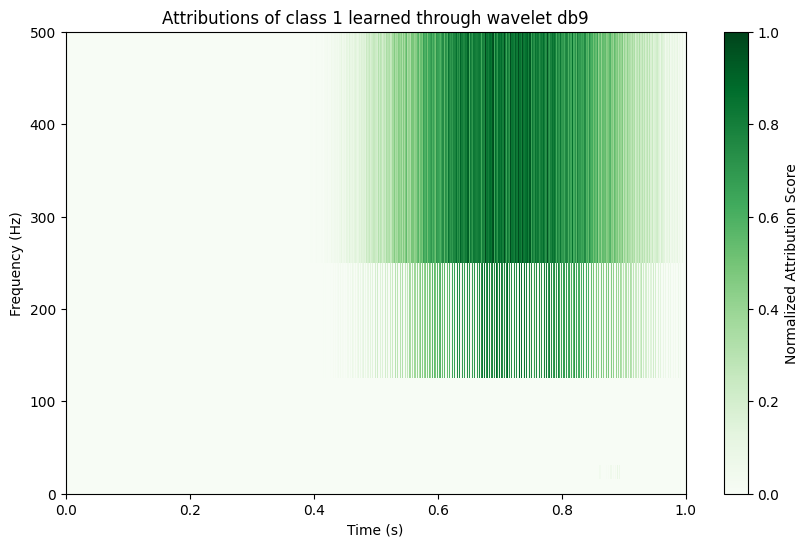

wavelet_db10_2_128


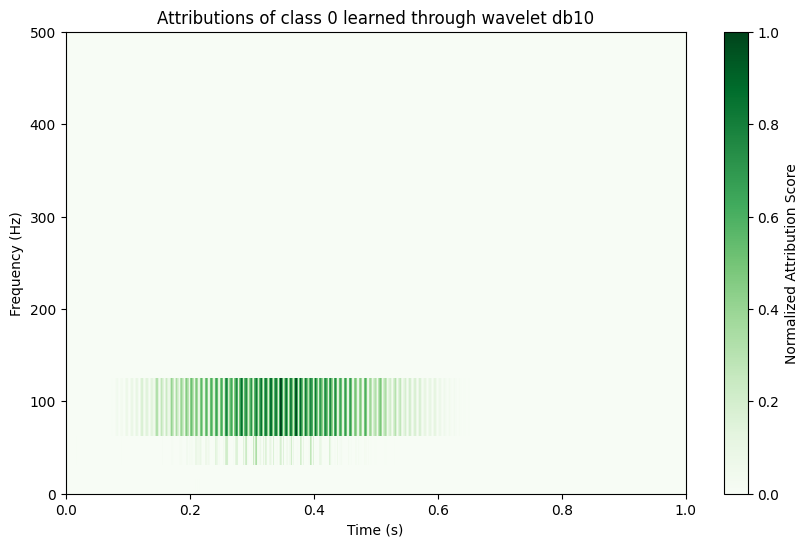

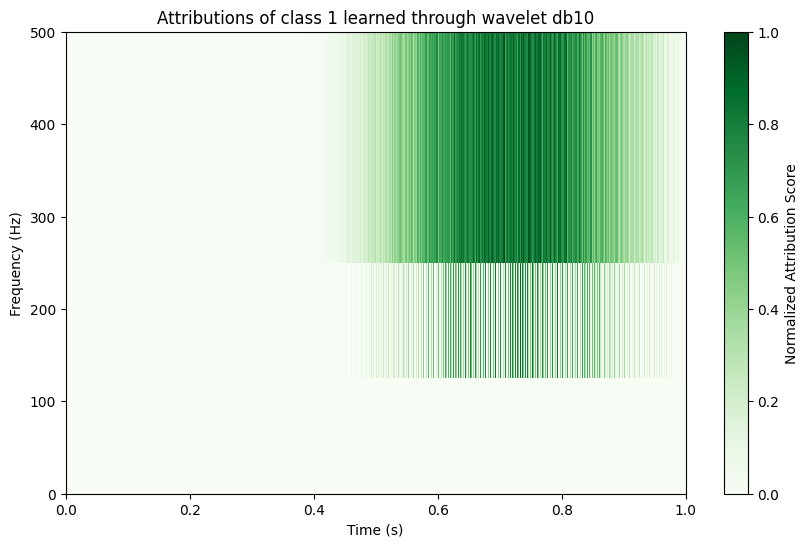

wavelet_sym2_5_128


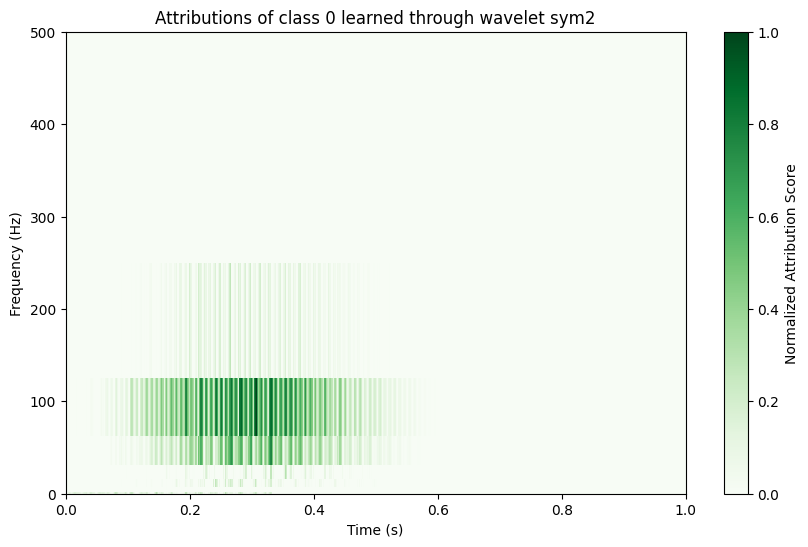

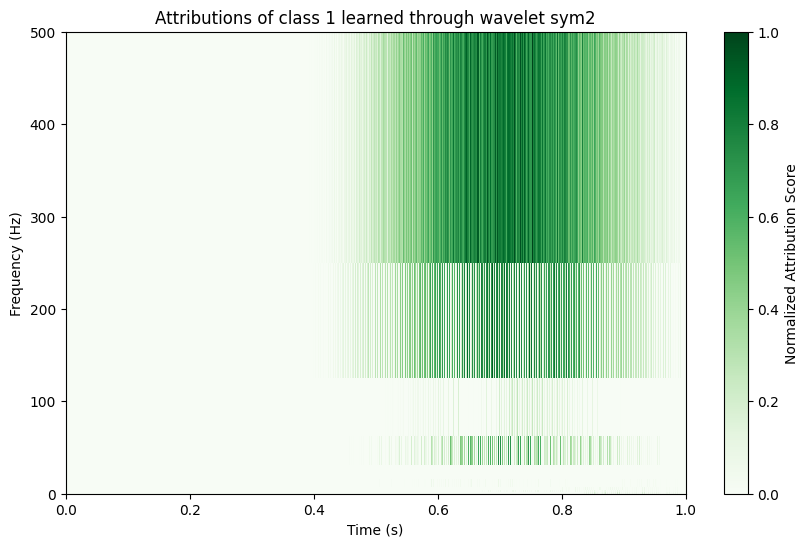

wavelet_sym3_4_128


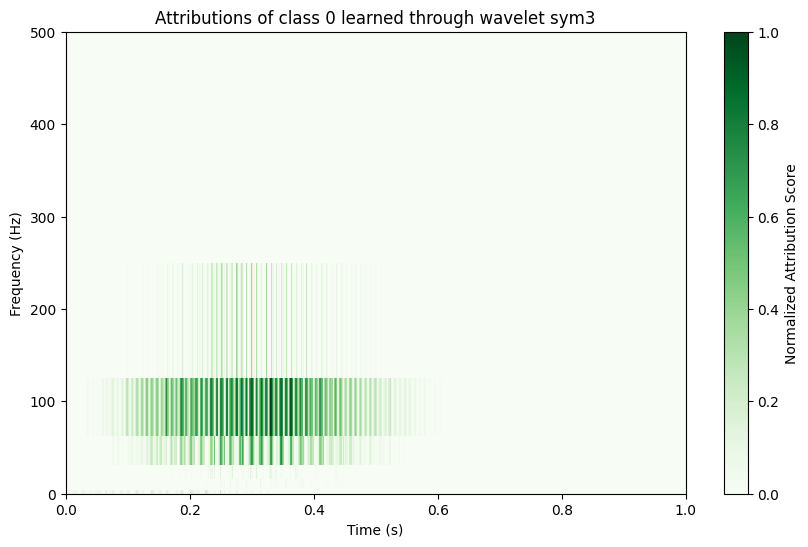

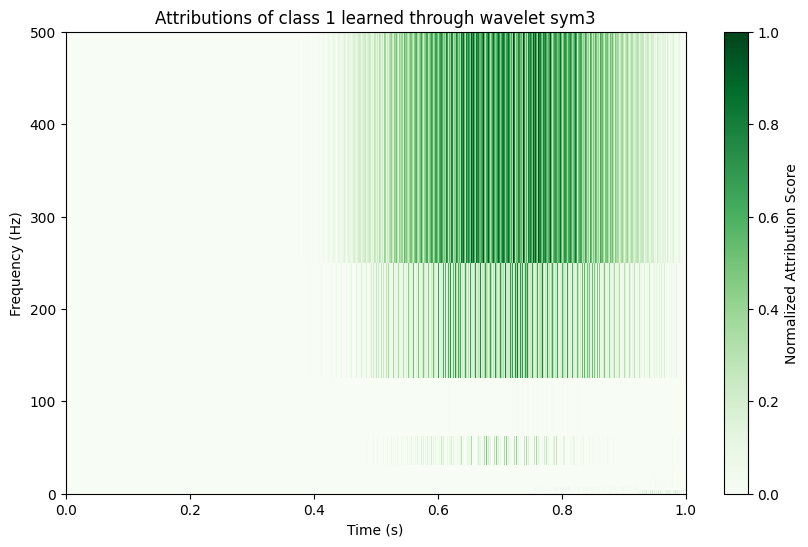

wavelet_sym4_3_128


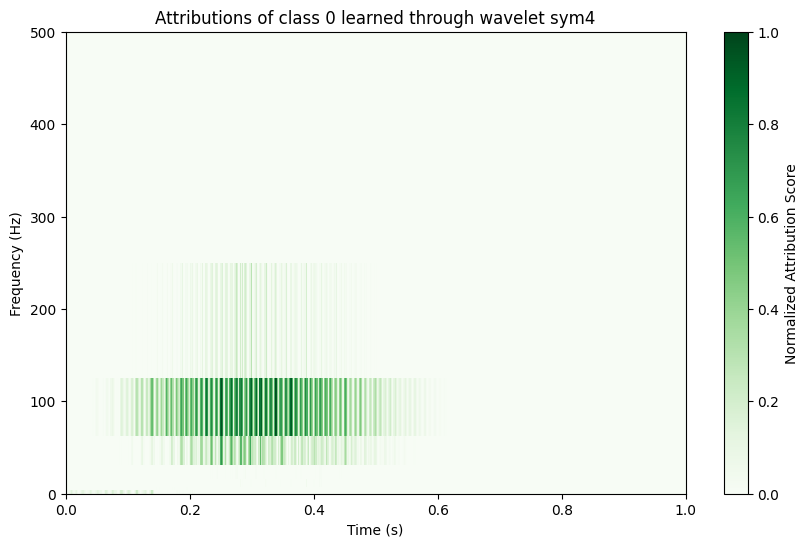

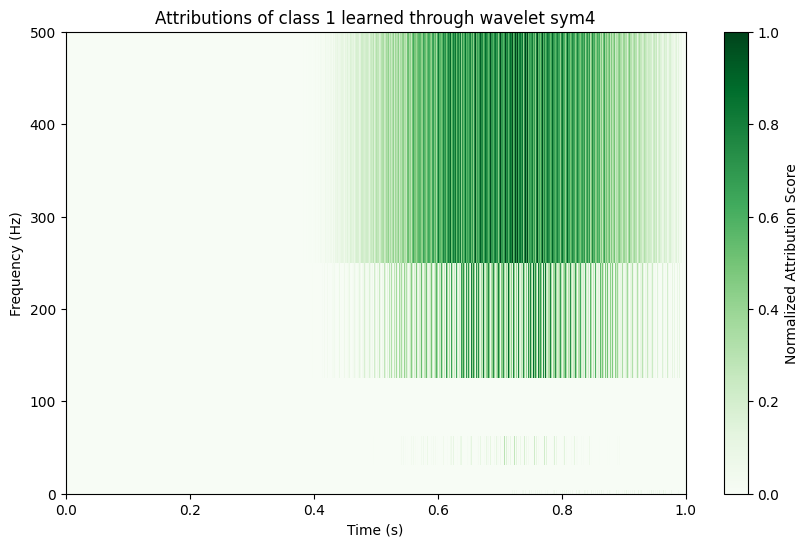

wavelet_sym5_3_128


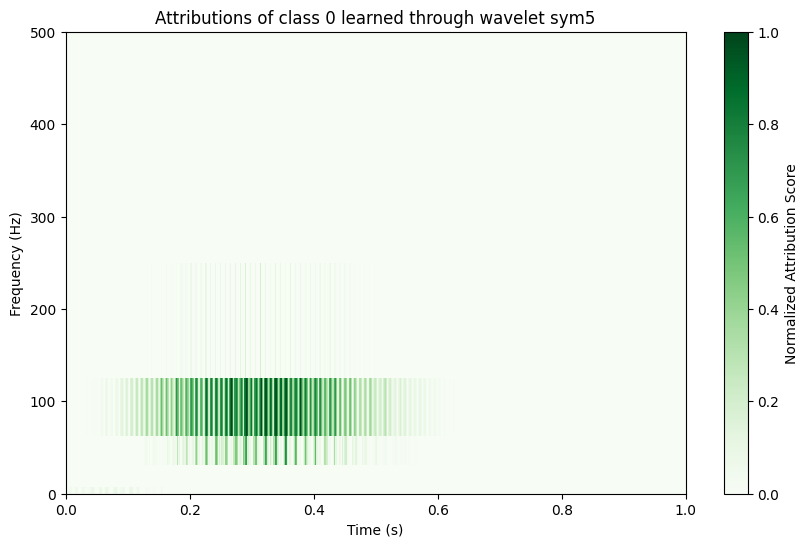

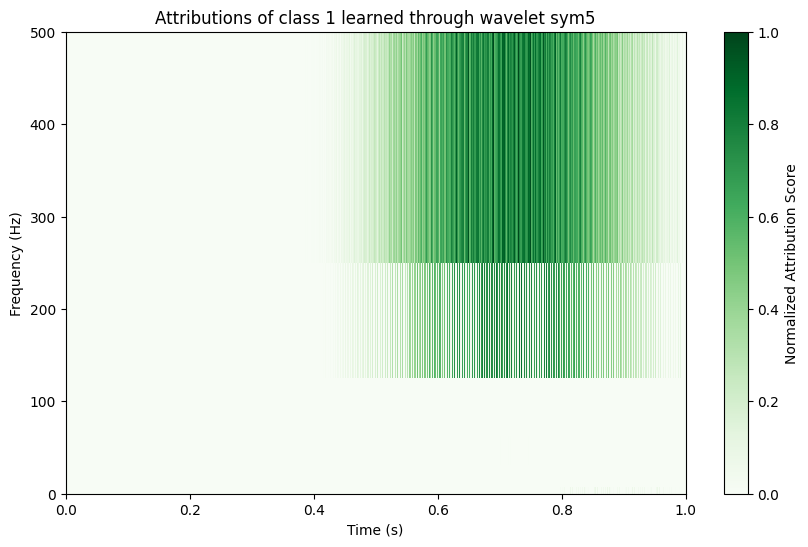

wavelet_sym6_3_128


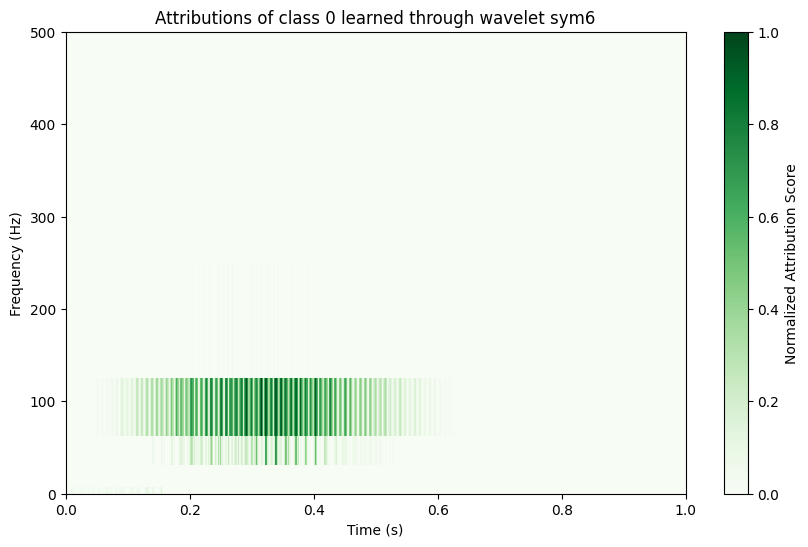

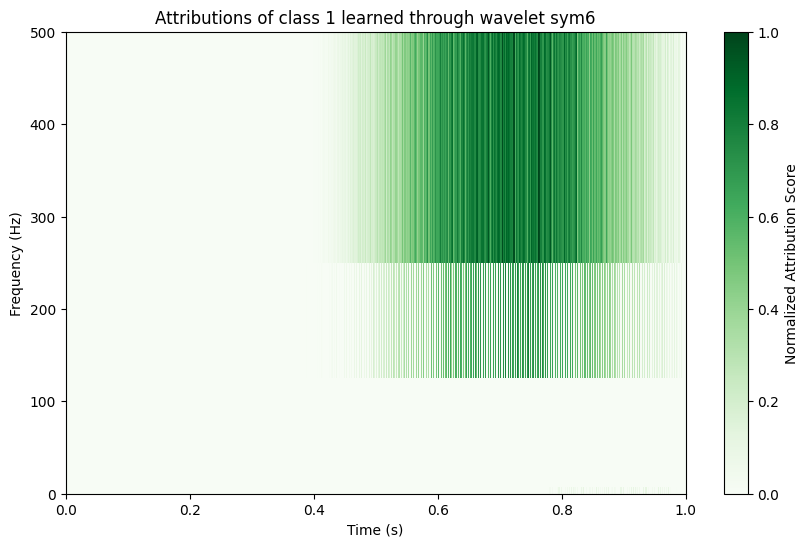

wavelet_sym7_2_128


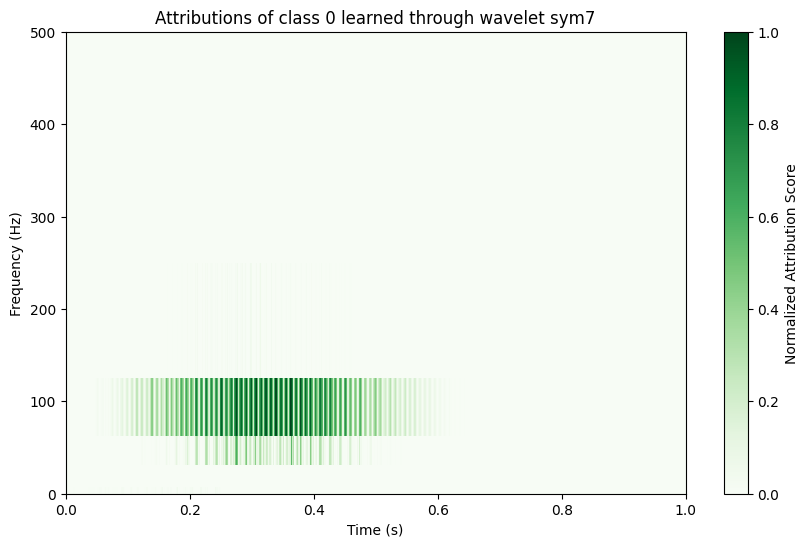

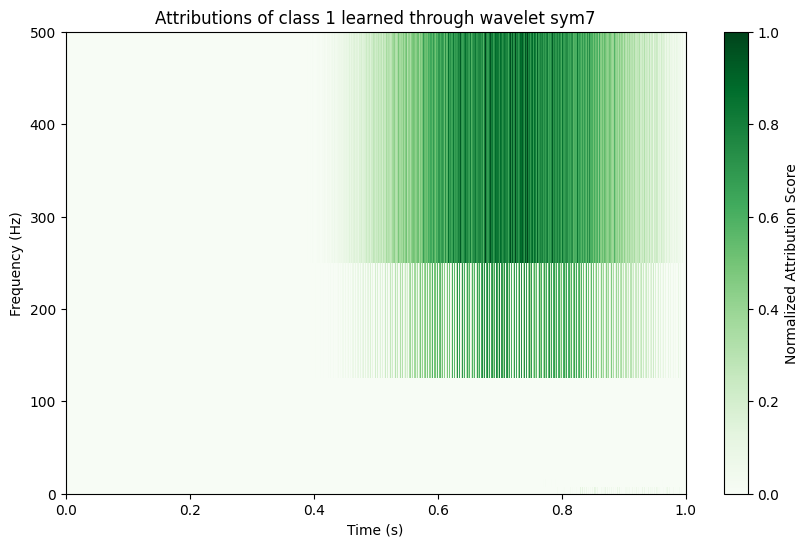

wavelet_sym8_2_128


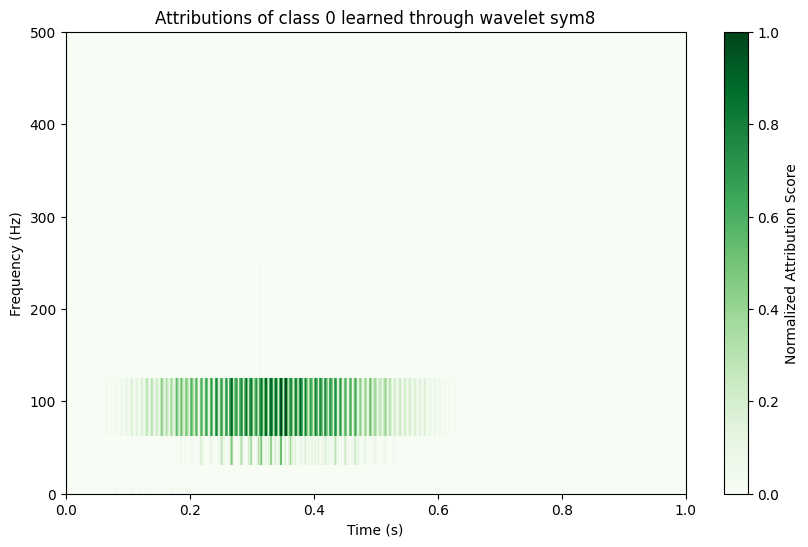

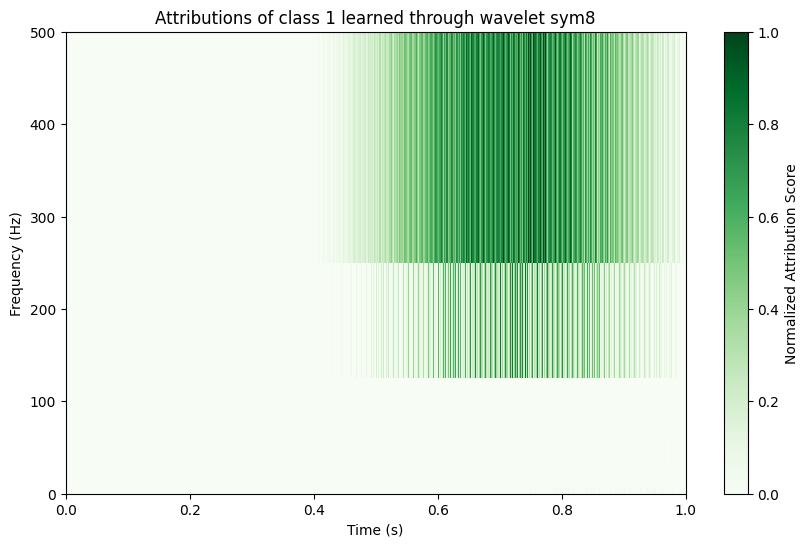

wavelet_sym9_2_128


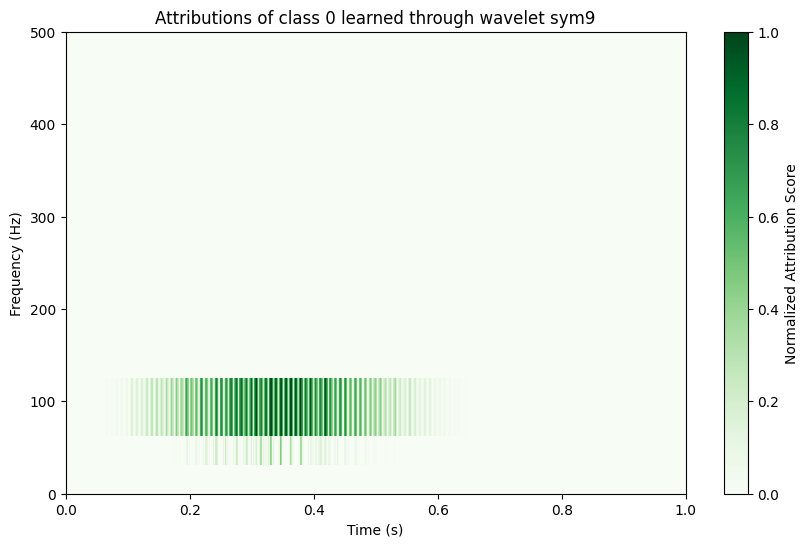

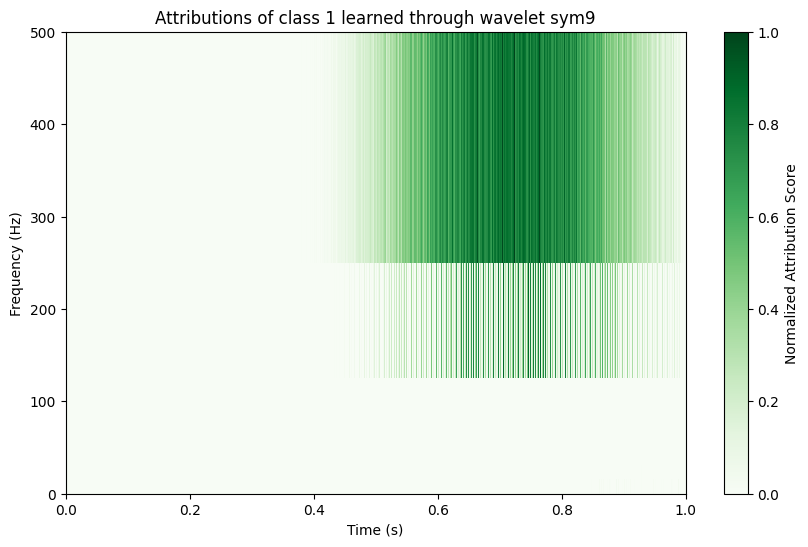

wavelet_sym10_2_128


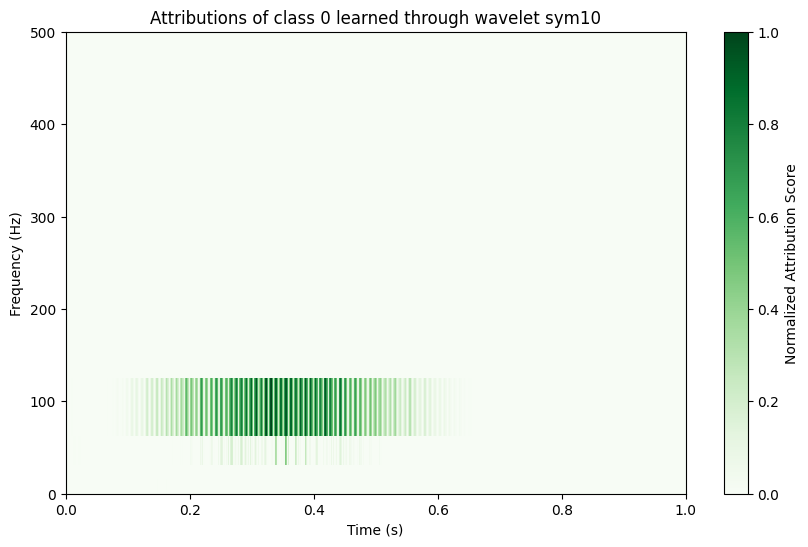

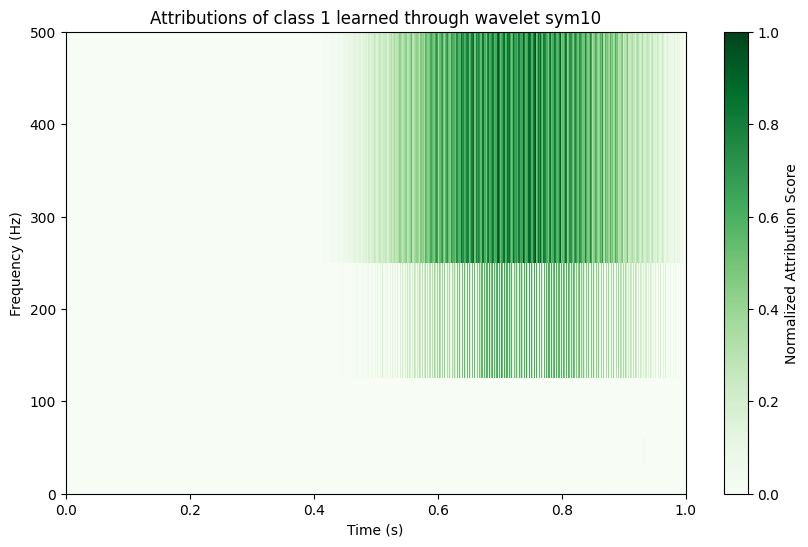

wavelet_coif1_4_128


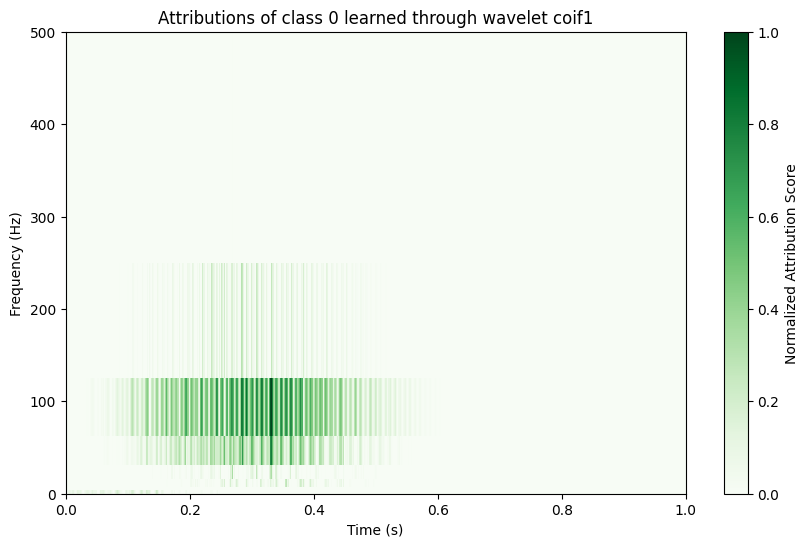

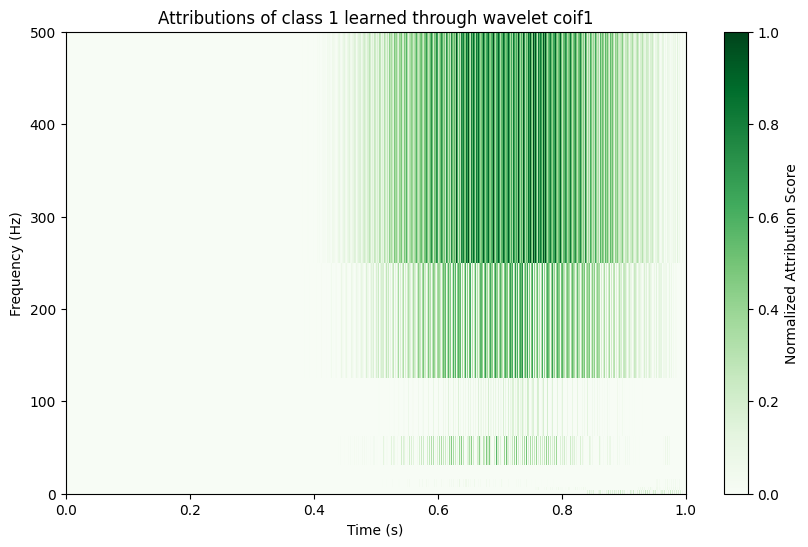

wavelet_coif2_3_128


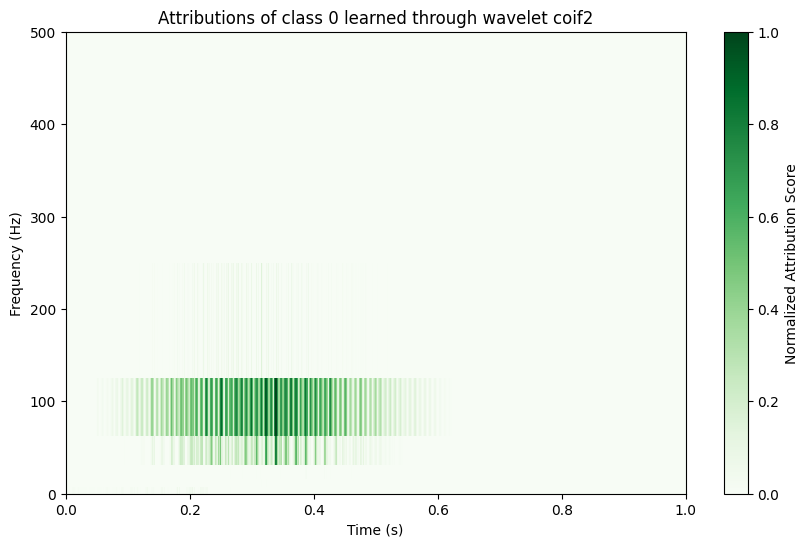

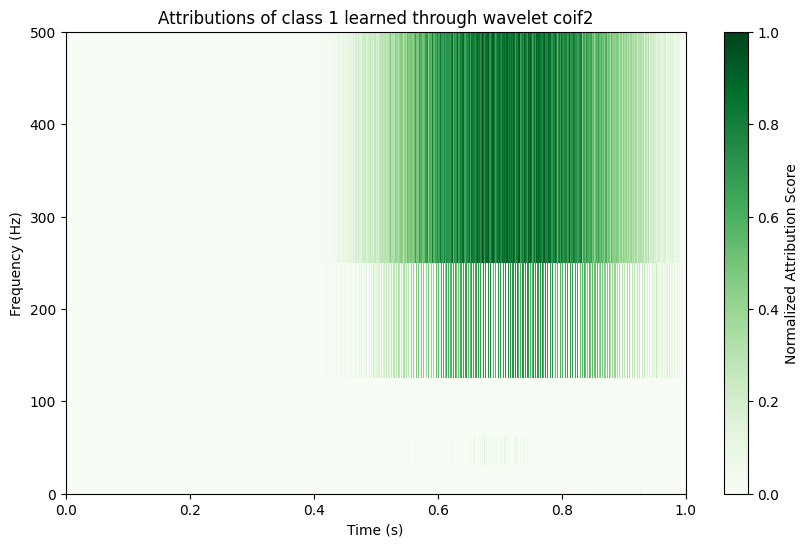

wavelet_coif3_2_128


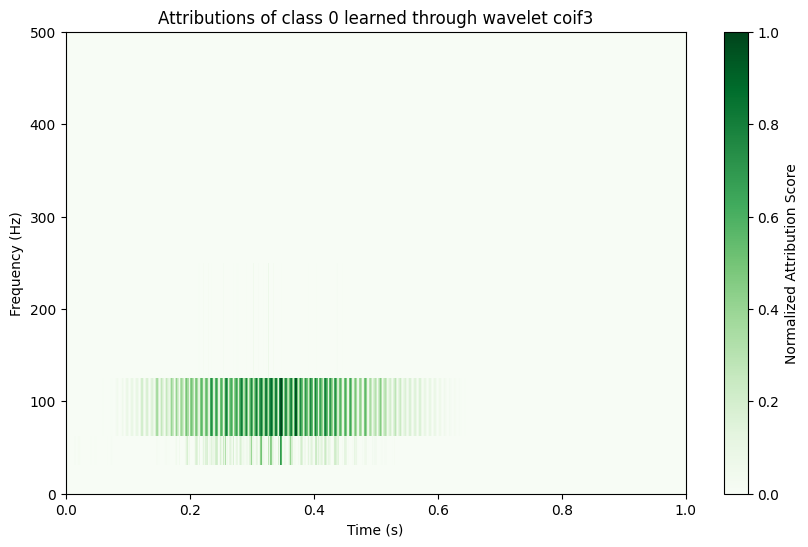

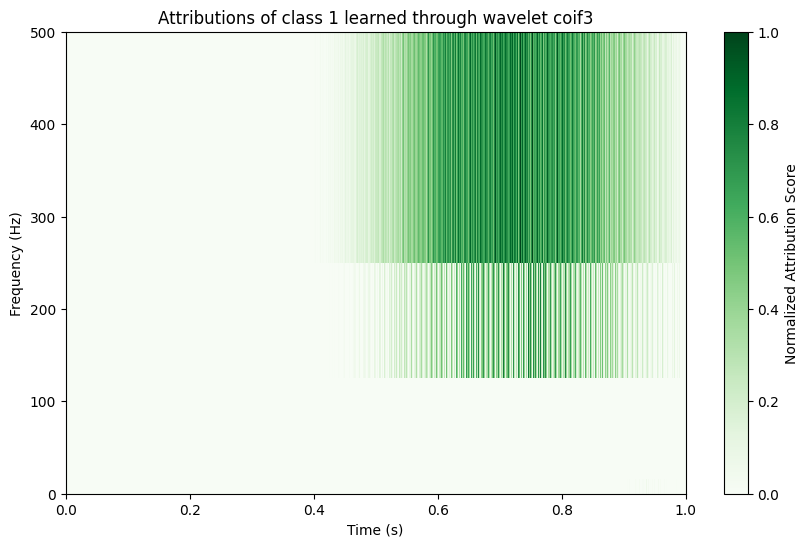

wavelet_coif4_2_128


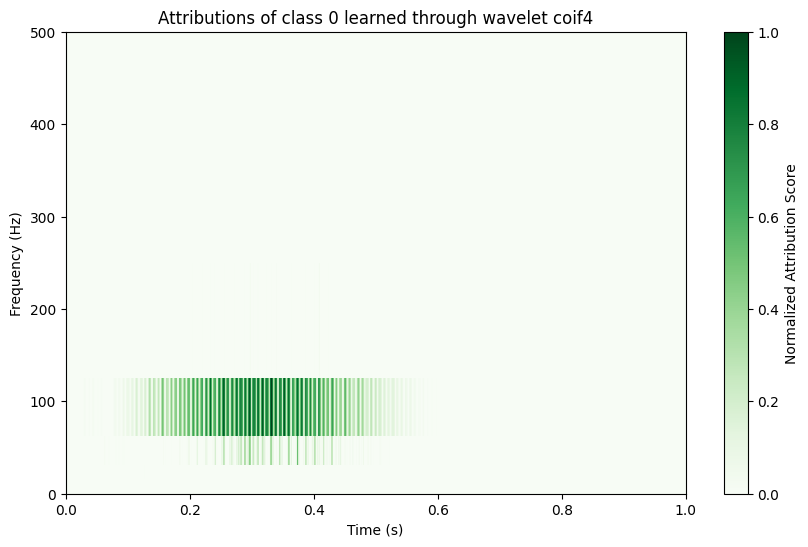

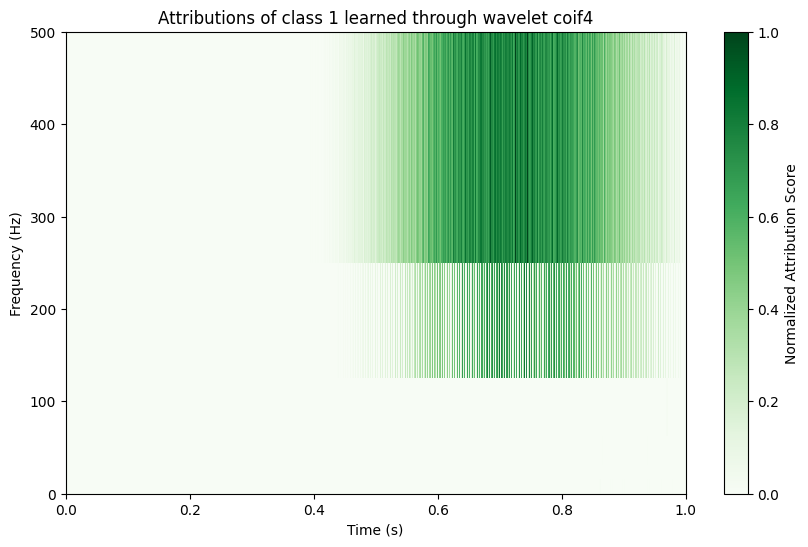

wavelet_coif5_1_128


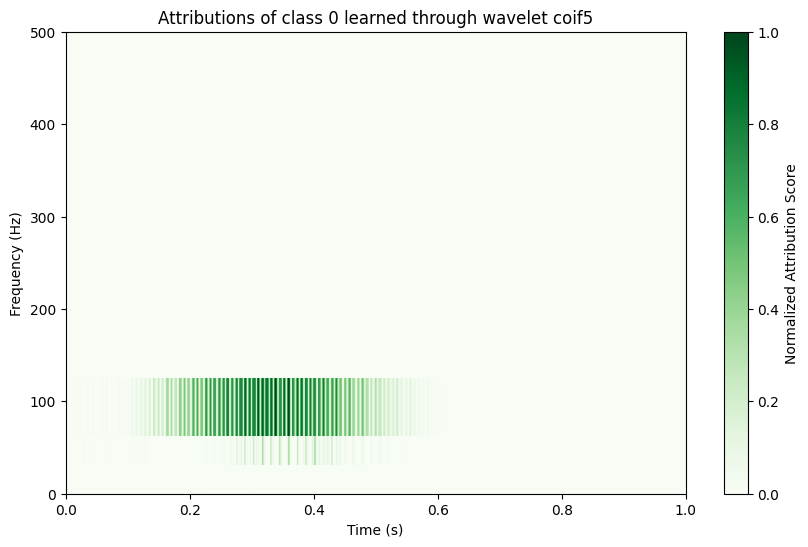

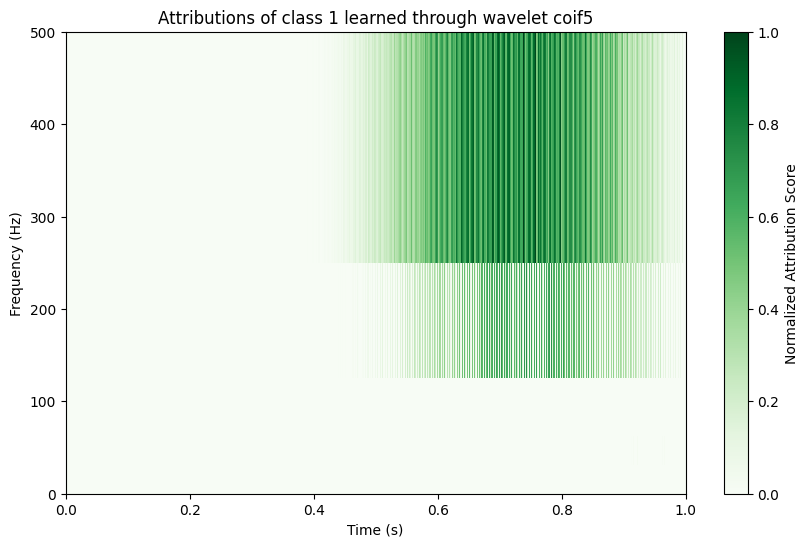

In [14]:
print("THE MAX NUMER OF LEVELS IN THE KEY NAME IS WRONG")

for key in attributions['insertion'].keys():
    print(key)

    method, wavelet, max_level, batch_size = key.split('_')
    max_level = int(max_level)

    key_ = f'filtermasks_{key}'

    masks_0 = np.zeros_like(attributions[key_][0][0])
    masks_1 = np.zeros_like(attributions[key_][0][0])

    index = 0

    for i in range(len(attributions[key_])):
        for j in range(len(attributions[key_][i])):
            # print(index)
            if attributions['labels'][index] == 0:
                masks_0 += attributions[key_][i][j]
            else:
                masks_1 += attributions[key_][i][j]

            index += 1

    masks_0 /= counts_0
    masks_1 /= counts_1

    plot_scaleogram_wav_heatmap(fs, masks_0, label=0, fs=fs, wavelet=wavelet)
    plot_scaleogram_wav_heatmap(fs, masks_1, label=1, fs=fs, wavelet=wavelet)



In [25]:
def compute_entropy_sample(attribution, epsilon=1e-10):
    abs_attr = np.abs(attribution)
    sum_attr = np.sum(abs_attr) + epsilon
    prob_dist = abs_attr / sum_attr
    entropy = -np.sum(prob_dist * np.log(prob_dist + epsilon))
    return entropy

In [27]:
# Compute the entropy-based complexity
complexity_scores = []

for i in range(len(attributions[key_])):
    attr = np.reshape(attributions[key][i], (attributions[key][i].shape[0], -1))
    scores = []
    # print(attributions[key_][i].shape)
    for sample in attr:
        sample = sample.detach().cpu().numpy()
        c = compute_entropy_sample(sample)
        c = np.nan_to_num(c)
        scores.append(c)
    complexity_scores += scores

# compute the mean
print(f"key: {key}")
mean_complexity = np.mean(complexity_scores)
print("Complexity Scores:")
print(mean_complexity)

key: wavelet_coif4_2_128
Complexity Scores:
2.335623


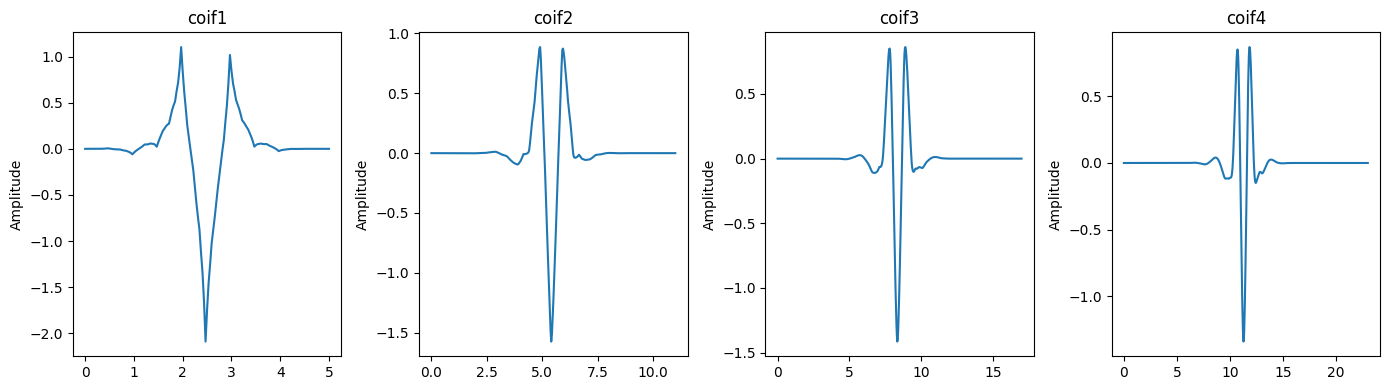

In [96]:
import pywt

# plot the db family wavelets from db1 to db4
def plot_wavelet_families(wavelet_families=['db'], wavelet_orders=None):
    plt.figure(figsize=(14, 4))

    for family in wavelet_families:
        for order in wavelet_orders:
            wavelet_name = f'{family}{order}'
            wavelet = pywt.Wavelet(wavelet_name)
            phi, psi, x = wavelet.wavefun(level=5)

            plt.subplot(len(wavelet_families), len(wavelet_orders), 
                        wavelet_families.index(family) * len(wavelet_orders) + (order ))
            # plt.plot(x, phi, label='Scaling Function')
            plt.plot(x, psi, label='Wavelet Function')
            plt.title(f'{wavelet_name}')
            # plt.xlabel('x')
            # plt.legend()
            plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Call the function to plot wavelet families
plot_wavelet_families(['coif'], [1, 2, 3, 4])

In [30]:
print(pywt.dwt_max_level(1000, 'coif5'))

5


['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

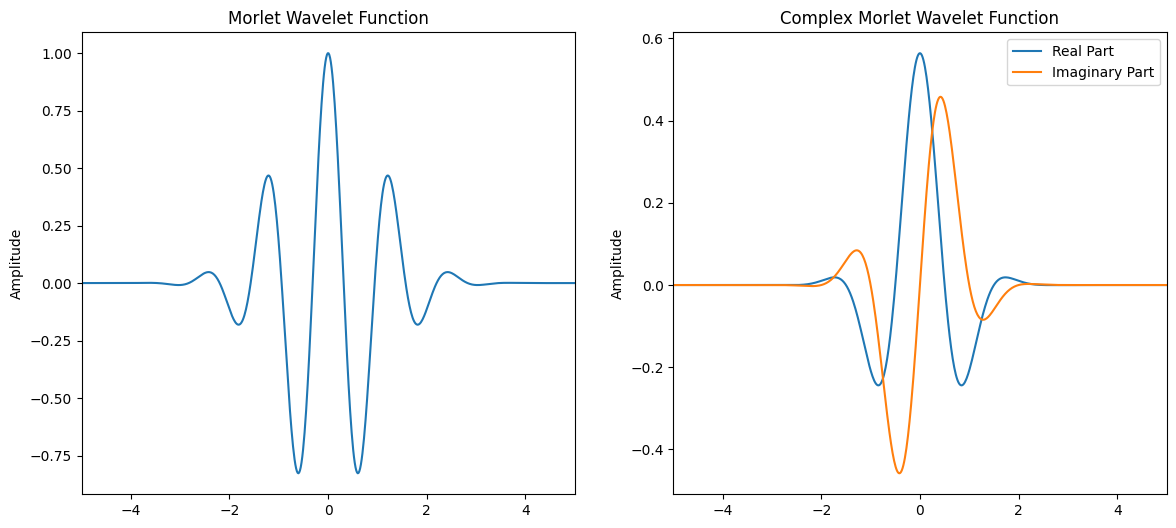

In [77]:
import pywt


print(pywt.wavelist())

# plot the morlet wavelet
morlet_wavelet = pywt.ContinuousWavelet('morl')
print(morlet_wavelet)

phi, x = morlet_wavelet.wavefun(level=10)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, phi, label='Morlet Wavelet Function')
plt.title('Morlet Wavelet Function')
plt.ylabel('Amplitude')
plt.xlim([-5, 5])

# plot the complex morlet wavelet
complex_morlet_wavelet = pywt.ContinuousWavelet('cmor1.0-0.5')
print(complex_morlet_wavelet)
phi, x = complex_morlet_wavelet.wavefun(level=10)
plt.subplot(1, 2, 2)
plt.plot(x, phi.real, label='Real Part')
plt.plot(x, phi.imag, label='Imaginary Part')
plt.title('Complex Morlet Wavelet Function')
plt.ylabel('Amplitude')
plt.xlim([-5, 5])
plt.legend()
plt.show()

